In [ ]:
class Robot:
    def __init__(self, name, x=0, y=0):
        self.name = name
        self.x = x
        self.y = y
        self.history = []  
       
        self.history.append((self.x, self.y))
        
    def command(self, cmd):
        """Выполняет команду: 'up', 'down', 'left', 'right'"""
        if cmd == "up":
            self.y += 1
        elif cmd == "down":
            self.y -= 1
        elif cmd == "left":
            self.x -= 1
        elif cmd == "right":
            self.x += 1
        else:
            print(f"❓ Неизвестная команда: {cmd}")
            return
        

        self.history.append((self.x, self.y))
    
    def show_history(self):
        """Показывает всю историю движения"""
        print(f"📜 История движения {self.name}:")
        for i, pos in enumerate(self.history):
            print(f"  Шаг {i}: {pos}")

# Тест в ячейке:
print("🧪 ТЕСТ 1.1: История состояний")
robot = Robot("Тест", 0, 0)
robot.command("right")
robot.command("right") 
robot.command("up")
robot.show_history()

# Автоматическая проверка результата:
expected_history = [(0,0), (1,0), (2,0), (2,1)]
if robot.history == expected_history:
    print("✅ ТЕСТ ПРОЙДЕН: История корректна")
else:
    print(f"❌ ТЕСТ НЕ ПРОЙДЕН: Ожидалось {expected_history}, получено {robot.history}")

# Дополнительный тест - возврат домой:
robot2 = Robot("Тест2", 5, 3)
robot2.command("left")
robot2.command("down") 
robot2.command("right")
robot2.command("up")

expected_history2 = [(5,3), (4,3), (4,2), (5,2), (5,3)]
if robot2.history == expected_history2:
    print("✅ ДОПОЛНИТЕЛЬНЫЙ ТЕСТ ПРОЙДЕН: Возврат в исходную точку")
else:
    print(f"❌ ДОПОЛНИТЕЛЬНЫЙ ТЕСТ НЕ ПРОЙДЕН: Ожидалось {expected_history2}, получено {robot2.history}")


🧪 ТЕСТ 1.1: История состояний
📜 История движения Тест:
  Шаг 0: (0, 0)
  Шаг 1: (1, 0)
  Шаг 2: (2, 0)
  Шаг 3: (2, 1)
✅ ТЕСТ ПРОЙДЕН: История корректна
✅ ДОПОЛНИТЕЛЬНЫЙ ТЕСТ ПРОЙДЕН: Возврат в исходную точку



🧪 ТЕСТ 1.2: Визуализация пути


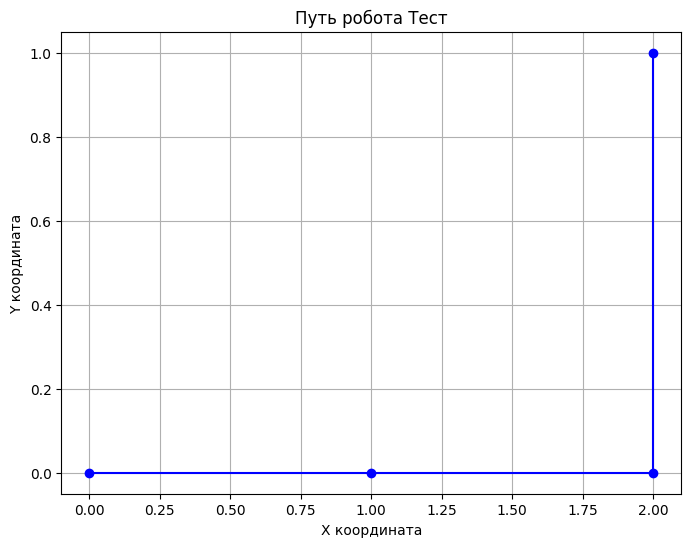

x_coords = [0, 1, 3]
y_coords = [0, 2, 1]


In [ ]:
import matplotlib.pyplot as plt

def plot_robot_path(robot):
    """Рисует график пути робота"""
    if not robot.history:
        print("История пуста!")
        return
    
  
    x_coords = [pos[0] for pos in robot.history]
    y_coords = [pos[1] for pos in robot.history]
    
    plt.figure(figsize=(8, 6))

    plt.plot(x_coords, y_coords, 'b-o')  # синяя линия с точками
    plt.title(f"Путь робота {robot.name}")
    plt.grid(True)
    plt.xlabel("X координата")
    plt.ylabel("Y координата")
    plt.show()

# Тест:
print("\n🧪 ТЕСТ 1.2: Визуализация пути")
plot_robot_path(robot)

# Проверка извлечения координат:
test_history = [(0,0), (1,2), (3,1)]
x_coords = [pos[0] for pos in test_history]
y_coords = [pos[1] for pos in test_history]

print("x_coords =", x_coords)  # ожидаем [0, 1, 3]
print("y_coords =", y_coords)  # ожидаем [0, 2, 1]


In [5]:
command = "north+east"
parts = command.split("+")

print(command, '->', parts)  # ['north', 'east']

mission = "forward_turn_right"  
actions = mission.split("_")
print(mission, '->', actions)  # ['forward', 'turn', 'right']

north+east -> ['north', 'east']
forward_turn_right -> ['forward', 'turn', 'right']


In [ ]:
def parse_combo_command(self, combo_cmd):
    """
    Разбирает комбинированную команду на простые с валидацией
    'north+east' → ['up', 'right']
    'south+west' → ['down', 'left']
    Возвращает список команд или None при ошибке
    """
    # Словарь перевода команд
    direction_map = {
        'north': 'up',
        'south': 'down', 
        'west': 'left',
        'east': 'right'
    }
    
    # Проверка наличия разделителя
    if "+" not in combo_cmd:
        # TODO: проверить, является ли команда одиночной валидной
        # если combo_cmd в direction_map, вернуть [direction_map[combo_cmd]]
        # иначе вернуть None
        pass
    
    # TODO: разбить команду через split("+")
    # TODO: проверить, что частей ровно 2
    # TODO: проверить, что обе части есть в direction_map
    # TODO: вернуть список переведенных команд или None при ошибке
    
# Добавить метод в класс Robot

# Тесты:
print("\n🧪 ТЕСТ 2.1: Разбор комбинированных команд")

robot = Robot("Парсер")

# Тест 1: Валидная комбинированная команда
result1 = robot.parse_combo_command("north+east")
expected1 = ['up', 'right']
if result1 == expected1:
    print("✅ ТЕСТ 1 ПРОЙДЕН: north+east → ['up', 'right']")
else:
    print(f"❌ ТЕСТ 1 НЕ ПРОЙДЕН: Ожидалось {expected1}, получено {result1}")

# Тест 2: Валидная одиночная команда
result2 = robot.parse_combo_command("west")
expected2 = ['left']
if result2 == expected2:
    print("✅ ТЕСТ 2 ПРОЙДЕН: west → ['left']")
else:
    print(f"❌ ТЕСТ 2 НЕ ПРОЙДЕН: Ожидалось {expected2}, получено {result2}")

# Тест 3: Невалидная команда
result3 = robot.parse_combo_command("north+invalid")
expected3 = None
if result3 == expected3:
    print("✅ ТЕСТ 3 ПРОЙДЕН: Невалидная команда возвращает None")
else:
    print(f"❌ ТЕСТ 3 НЕ ПРОЙДЕН: Ожидалось {expected3}, получено {result3}")

# Тест 4: Слишком много частей
result4 = robot.parse_combo_command("north+east+south")
expected4 = None
if result4 == expected4:
    print("✅ ТЕСТ 4 ПРОЙДЕН: Команда из 3 частей возвращает None")
else:
    print(f"❌ ТЕСТ 4 НЕ ПРОЙДЕН: Ожидалось {expected4}, получено {result4}")

# Тест 5: Команда без разделителя, но невалидная
result5 = robot.parse_combo_command("invalid")
expected5 = None
if result5 == expected5:
    print("✅ ТЕСТ 5 ПРОЙДЕН: Невалидная одиночная команда возвращает None")
else:
    print(f"❌ ТЕСТ 5 НЕ ПРОЙДЕН: Ожидалось {expected5}, получено {result5}")